In [14]:
import geopandas as gpd

roads = gpd.read_file("road_networks/swisstlm3d_roads_2025.gpkg")

### Crop the roads to Vaud:

In [15]:
import osmnx as ox
from geopandas import overlay

place = "Vaud, Switzerland"
bound = ox.geocode_to_gdf(place)

target_crs = "EPSG:2056" # roads_gdf crs
bound = bound.to_crs(target_crs)

roads = overlay(roads, bound, how='intersection')

In [22]:
print(roads.columns)

Index(['name_1', 'creation_year', 'object_type', 'engineering_structure',
       'passability', 'hierarchy_level', 'direction_separated', 'surface_type',
       'traffic_significance', 'bbox_west', 'bbox_south', 'bbox_east',
       'bbox_north', 'place_id', 'osm_type', 'osm_id', 'lat', 'lon', 'class',
       'type', 'place_rank', 'importance', 'addresstype', 'name_2',
       'display_name', 'geometry'],
      dtype='object')


In [32]:
print("The types of roads available in this dataset are:")
print(roads["object_type"].unique())

print("\n There are also hierarchy levels for the roads:")
print(roads["hierarchy_level"].unique())

The types of roads available in this dataset are:
['Autobahn' 'Autostrasse' 'Ausfahrt' 'Einfahrt' 'Zufahrt' '8m Strasse'
 '4m Strasse' '6m Strasse' '10m Strasse' '3m Strasse' 'Verbindung'
 '2m Weg' '1m Weg' 'Platz' 'Markierte Spur' '1m Wegfragment'
 '2m Wegfragment' 'Raststaette' 'Dienstzufahrt' 'Klettersteig'
 'Provisorium']

 There are also hierarchy levels for the roads:
['0' '2' '1' '-2' '-1' '-3']


### Filter for main roads:
from the list of type of roads, selct the ones to keep in teh network.

In [39]:
main_roads = [
    'Autobahn',
    'Autostrasse',
    'Ausfahrt',
    'Einfahrt',
    'Zufahrt'
]
roads_clean = roads[roads["object_type"].isin(main_roads)].copy()


In [40]:
print(roads_clean["name_1"].unique())

[None 'Pont de la Gare' 'Tunnel de Belmont' 'Pont de la Cornalle'
 'Tunnel de la Criblette' 'Pont de la Bahyse' 'Tunnel du Flonzaley'
 'Tunnel de Chauderon' 'Pont du Crau Coulet' 'Pont du Daillard'
 'Pont de la Grande Combe' 'Pont de la Praz'
 "Viaduc de la Plaine de l'Orbe" 'Viaduc des Vaux' 'Ponts de Cronay'
 'Tunnel de Champ-Baly' 'Ponts sur le Buron' 'Tunnel de Pomy'
 'Ponts sur la Menthue' 'Ponts de Cuarny' "Viaducs d'Ependes"
 'Viaducs du Chêne' 'Ponts du Talent' "Viaduc d'Yverdon"
 'Pont de Corcelles' "Tunnel d'Onnens" "Pont sur l'Arnon"
 'Pont sur le Grandsonnet' 'Viaduc de la Brine' 'Tunnel de Concise'
 'Passage à faune de la Raisse' 'Ponts de la Raisse' 'Ponts sur la Dia'
 'Tunnel de la Lance' 'Ponts de la Golaz' "Tunnel d'Arrissoules"
 'Ponts de la Baume' 'Pont du Landrement' 'Pont de Lignerolle'
 'Pont de Palure' 'Viaduc du Bois de Rosset' 'Pont sur la Broye'
 'Pont sur la Salenche' 'Pont sur la Veveyse' 'Pont du Chenaux'
 'Pont des Curnilles' 'Pont de Saumont' 'Pont sur la

### Visualize the selected roads:

(np.float64(2496567.4546969663),
 np.float64(2577163.8233663784),
 np.float64(1115261.7687087364),
 np.float64(1198630.5285135298))

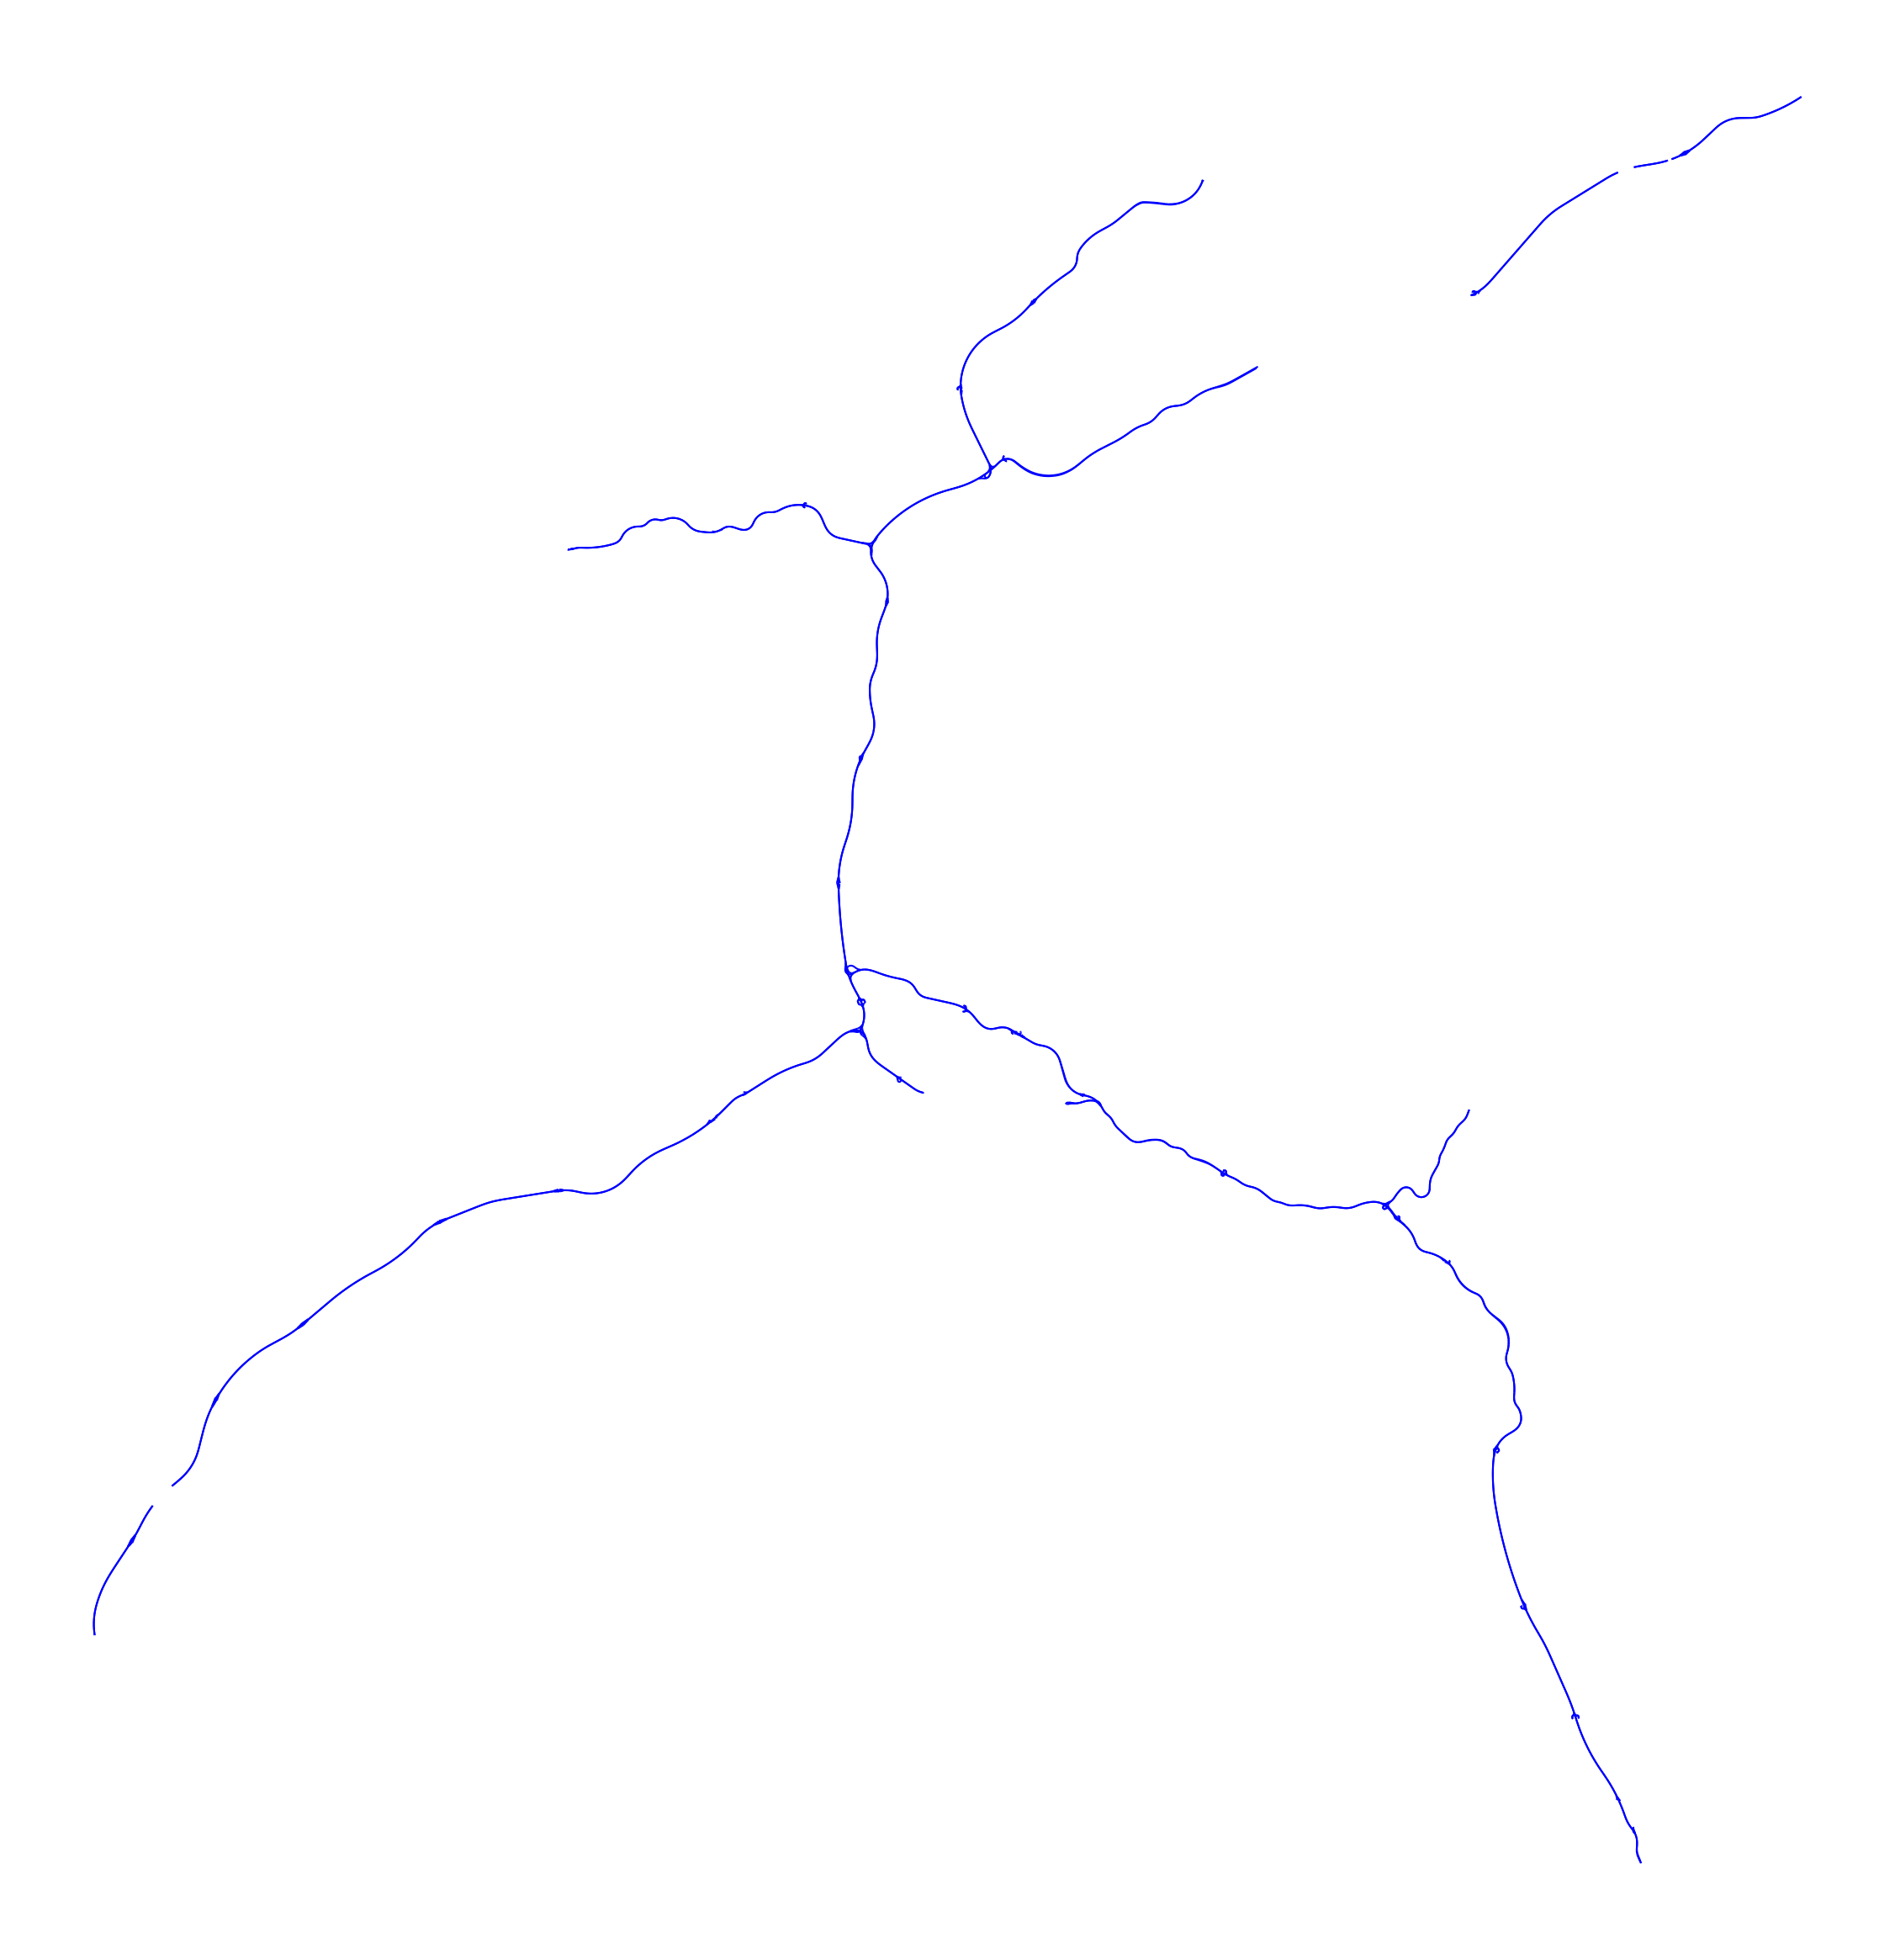

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(30, 30))
roads_clean.plot(ax=ax, color='blue')
ax.axis('off')


#### Save the cleaned roads to a GeoPackage file for further use in the buffers generation notebook:

In [9]:
# roads_clean.to_file("road_networks/vaud_main_roads.gpkg", driver="GPKG")